### Read Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("House_Data.csv")
print(len(df))
df.head()

21613


,Id,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,7129300520,1180,3,1,85,221.9
1,6414100192,2570,3,2,89,538.0
2,5631500400,770,2,1,107,180.0
3,2487200875,1960,4,1,75,604.0
4,1954400510,1680,3,1,53,510.0


In [3]:
# Convert All Features to Numpy Array
x1 = df['Size (sqft)'].to_numpy()
x2 = df['Number of Bedrooms'].to_numpy()
x3 = df['Number of Floors'].to_numpy()
x4 = df['Age of Home'].to_numpy()
x = np.array([x1,x2,x3,x4])

In [4]:
# Calculate Z-Score of Each Feature
mu_x1 = np.mean(x1)
sd_x1 = np.std(x1)
mu_x2 = np.mean(x2)
sd_x2 = np.std(x2)
mu_x3 = np.mean(x3)
sd_x3 = np.std(x3)
mu_x4 = np.mean(x4)
sd_x4 = np.std(x4)
z1 = np.divide(np.subtract(x1, mu_x1), sd_x1)
z2 = np.divide(np.subtract(x2, mu_x2), sd_x2)
z3 = np.divide(np.subtract(x3, mu_x3), sd_x3)
z4 = np.divide(np.subtract(x4, mu_x4), sd_x4)

### Gradient Decent Algorithm

In [5]:
# Predict Y
def predict_y(w,x,b):
    y_pred = np.dot(w,x)+b
    return y_pred

# Calculate cost of model
def calculate_cost(y,y_pred):
    m = len(y)
    diff = np.subtract(y_pred,y)
    sqr_diff = np.square(diff)
    j = (1/(2*m)) * np.sum(sqr_diff)
    return j

# Calculate Gradient
def calculate_gradient(x,y,y_pred):
    m = len(y)
    diff = np.subtract(y_pred,y)
    dj_dw = (1/m) * np.dot(diff,x.T)
    dj_db = (1/m) * np.sum(diff)
    return dj_dw,dj_db

def optimize_weights(w,x,b,y,iter,alpha):
    dj_dw = np.zeros(4)
    dj_db = 0
    w_all = np.zeros((iter,4))
    b_all = np.zeros(iter)
    j_all = np.zeros(iter)
        
    for i in range(0,iter):
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        y_pred = predict_y(w,x,b)
        j = calculate_cost(y,y_pred)
        dj_dw, dj_db = calculate_gradient(x,y,y_pred)
        print(f"Iteration {i}: w = {w}, b = {b:.4f}, Cost = {j:.4f}")
        #print(f"dj_dw = {dj_dw},dj_db = {dj_db}")
        w_all[i,] = w
        b_all[i] = b
        j_all[i] = j
    
    return w_all,b_all,j_all 

In [6]:
w = np.array([ 0.39, 18.75, -53.36, -26.42])
x1 = df['Size (sqft)'].to_numpy()
x2 = df['Number of Bedrooms'].to_numpy()
x3 = df['Number of Floors'].to_numpy()
x4 = df['Age of Home'].to_numpy()
x = np.array([x1,x2,x3,x4])
b = 700
y = df['Price (1000s dollars)'].to_numpy()
alpha = 0.001
iter = 1000

In [7]:
w_all,b_all,j_all = optimize_weights(w,x,b,y,iter,alpha)

Iteration 0: w = [  0.39  18.75 -53.36 -26.42], b = 700.0000, Cost = 777933.9087
Iteration 1: w = [1482.4209697    21.45821269  -52.36279437   58.4477328 ], b = 700.8657, Cost = 5691986151900.2461
Iteration 2: w = [-7.66983727e+06 -1.11158015e+04 -4.78237839e+03 -2.00294080e+05], b = -2386.6112, Cost = 152259076866903179264.0000
Iteration 3: w = [3.96685110e+10 5.75860751e+07 2.44576369e+07 1.03576322e+09], b = 15963972.4769, Cost = 4072889253180534898263326720.0000
Iteration 4: w = [-2.05166100e+14 -2.97835897e+11 -1.26495521e+11 -5.35698188e+12], b = -82562269421.2015, Cost = 108948689365654718715758128792600576.0000
Iteration 5: w = [1.06112197e+18 1.54041147e+15 6.54236623e+14 2.77063861e+16], b = 427013229371506.0625, Cost = 2914348065129623151485779461627466085302272.0000
Iteration 6: w = [-5.48813787e+21 -7.96702994e+18 -3.38372107e+18 -1.43297821e+20], b = -2208518464798057216.0000, Cost = 77958024958143896901150174412365720787946120937472.0000
Iteration 7: w = [2.83847267e+25 

C:\Users\abc\AppData\Local\Temp\ipykernel_4308\455650749.py:10: RuntimeWarning: overflow encountered in square
  sqr_diff = np.square(diff)


Iteration 711: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 712: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 713: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 714: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 715: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 716: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 717: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 718: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 719: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 720: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 721: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 722: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 723: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 724: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 725: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 726: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 727: w = [nan nan nan nan], b = nan, Cost = nan
Iteration 728:

In [8]:
min_value = np.min(j_all) # Finding the minimum value
min_index = np.argmin(j_all) # Finding the position (index) of the minimum value
cost = j_all[min_index]
w = w_all[min_index]
b = b_all[min_index]
print(f"Optimize value of w = {w}, b = {b}, with Cost = {cost}")

Optimize value of w = [            -inf             -inf -5.85507002e+300             -inf], b = -3.821541426626059e+300, with Cost = nan


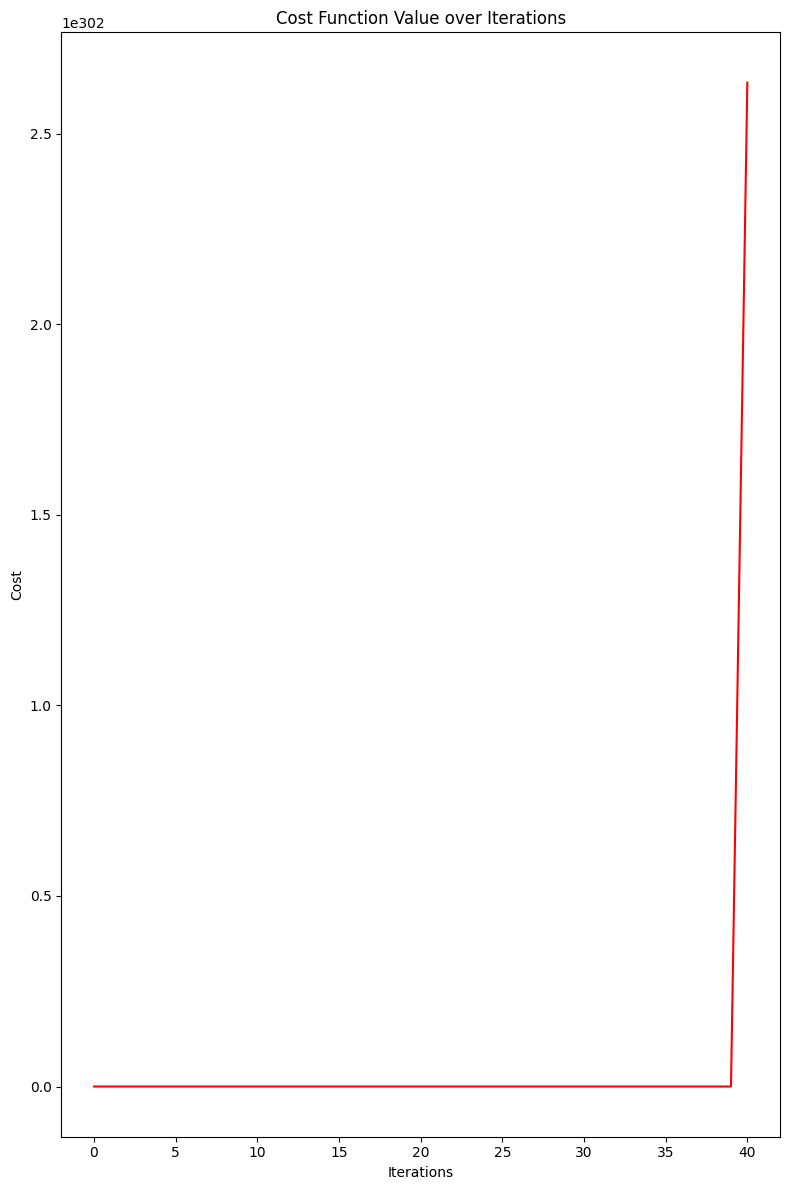

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the weight values over iterations
plt.figure(figsize=(8, 12))

# Plot for cost_all
#plt.subplot(3, 1, 3)
plt.plot(j_all, color='red')
plt.title('Cost Function Value over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

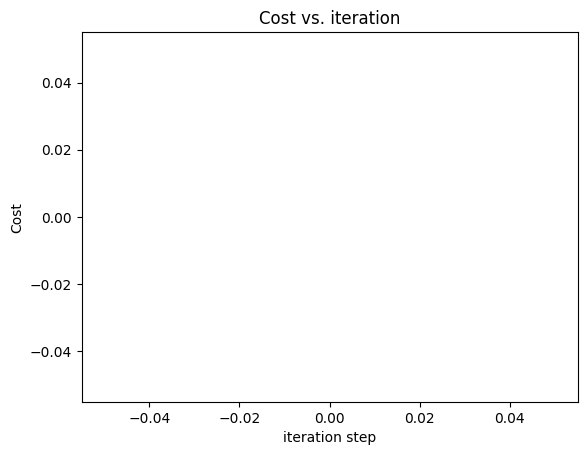

In [10]:
plt.plot(100 + np.arange(len(j_all[100:])), j_all[100:],color='red')
plt.title("Cost vs. iteration") 
plt.ylabel('Cost')              
plt.xlabel('iteration step')   
plt.show()

### Gradient Decent Algorithm with Feature Scaling

In [14]:
w = np.array([ 0.39, 18.75, -53.36, -26.42])
x1 = df['Size (sqft)'].to_numpy()
x2 = df['Number of Bedrooms'].to_numpy()
x3 = df['Number of Floors'].to_numpy()
x4 = df['Age of Home'].to_numpy()
x = np.array([x1,x2,x3,x4])
b = 700
y = df['Price (1000s dollars)'].to_numpy()
alpha = 0.001
iter = 1000

In [18]:
# Calculate Z-Score of Each Feature
mu_x1 = np.mean(x1)
sd_x1 = np.std(x1)
mu_x2 = np.mean(x2)
sd_x2 = np.std(x2)
mu_x3 = np.mean(x3)
sd_x3 = np.std(x3)
mu_x4 = np.mean(x4)
sd_x4 = np.std(x4)
z1 = np.divide(np.subtract(x1, mu_x1), sd_x1)
z2 = np.divide(np.subtract(x2, mu_x2), sd_x2)
z3 = np.divide(np.subtract(x3, mu_x3), sd_x3)
z4 = np.divide(np.subtract(x4, mu_x4), sd_x4)
z = np.array([z1,z2,z3,z4])

In [19]:
# Predict Y
def predict_y(w,z,b):
    y_pred = np.dot(w,z)+b
    return y_pred

In [20]:
y_pred = predict_y(w,z,b)
y_pred

array([720.88858015, 621.19338443, 680.76563839, ..., 652.54424824,
       668.45358864, 651.64477452])

In [11]:
import numpy as np

# Predict Y
def predict_y(w,z,b):
    y_pred = np.dot(w,z)+b
    return y_pred

# Calculate cost of model
def calculate_cost(y,y_pred):
    m = len(y)
    diff = np.subtract(y_pred,y)
    sqr_diff = np.square(diff)
    j = (1/(2*m)) * np.sum(sqr_diff)
    return j

# Calculate Gradient
def calculate_gradient(z,y,y_pred):
    m = len(y)
    diff = np.subtract(y_pred,y)
    dj_dw = (1/m) * np.dot(diff,z.T)
    dj_db = (1/m) * np.sum(diff)
    return dj_dw,dj_db

def optimize_weights(w,z,b,y,iter,alpha):
    dj_dw = np.zeros(4)
    dj_db = 0
    w_all = np.zeros((iter,4))
    b_all = np.zeros(iter)
    j_all = np.zeros(iter)
        
    for i in range(0,iter):
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        y_pred = predict_y(w,z,b)
        j = calculate_cost(y,y_pred)
        dj_dw, dj_db = calculate_gradient(z,y,y_pred)
        print(f"Iteration {i}: w = {w}, b = {b:.4f}, Cost = {j:.4f}")
        #print(f"dj_dw = {dj_dw},dj_db = {dj_db}")
        w_all[i,] = w
        b_all[i] = b
        j_all[i] = j
    
    return w_all,b_all,j_all 

In [12]:
w = np.array([ 0.39, 18.75, -53.36, -26.42])
z = np.array([z1,z2,z3,z4])
b = 700
y = df['Price (1000s dollars)'].to_numpy()
alpha = 0.001
iter = 10000

In [13]:
w_all,b_all,j_all = optimize_weights(w,z,b,y,iter,alpha)

Iteration 0: w = [  0.39  18.75 -53.36 -26.42], b = 700.0000, Cost = 83127.4883
Iteration 1: w = [  0.64697796  18.84845775 -53.23789862 -26.4412689 ], b = 699.8401, Cost = 83010.9132
Iteration 2: w = [  0.90359226  18.94664656 -53.11603776 -26.46234896], b = 699.6803, Cost = 82894.6953
Iteration 3: w = [  1.15984357  19.04456699 -52.99441692 -26.48324068], b = 699.5207, Cost = 82778.8332
Iteration 4: w = [  1.41573254  19.14221957 -52.87303556 -26.50394454], b = 699.3613, Cost = 82663.3256
Iteration 5: w = [  1.67125983  19.23960485 -52.75189317 -26.52446102], b = 699.2020, Cost = 82548.1713
Iteration 6: w = [  1.92642611  19.33672337 -52.63098924 -26.5447906 ], b = 699.0429, Cost = 82433.3690
Iteration 7: w = [  2.18123204  19.43357568 -52.51032324 -26.56493377], b = 698.8840, Cost = 82318.9175
Iteration 8: w = [  2.43567827  19.53016231 -52.38989467 -26.584891  ], b = 698.7252, Cost = 82204.8154
Iteration 9: w = [  2.68976545  19.6264838  -52.26970301 -26.60466277], b = 698.5665, Co

In [151]:
min_value = np.min(j_all) # Finding the minimum value
min_index = np.argmin(j_all) # Finding the position (index) of the minimum value
cost = j_all[min_index]
w = w_all[min_index]
b = b_all[min_index]
print(f"Optimize value of w = {w}, b = {b}, with Cost = {cost}")

Optimize value of w = [303.53362553 -54.04868072  41.82263049  92.57209434], b = 540.095372751212, with Cost = 30423.705339085205


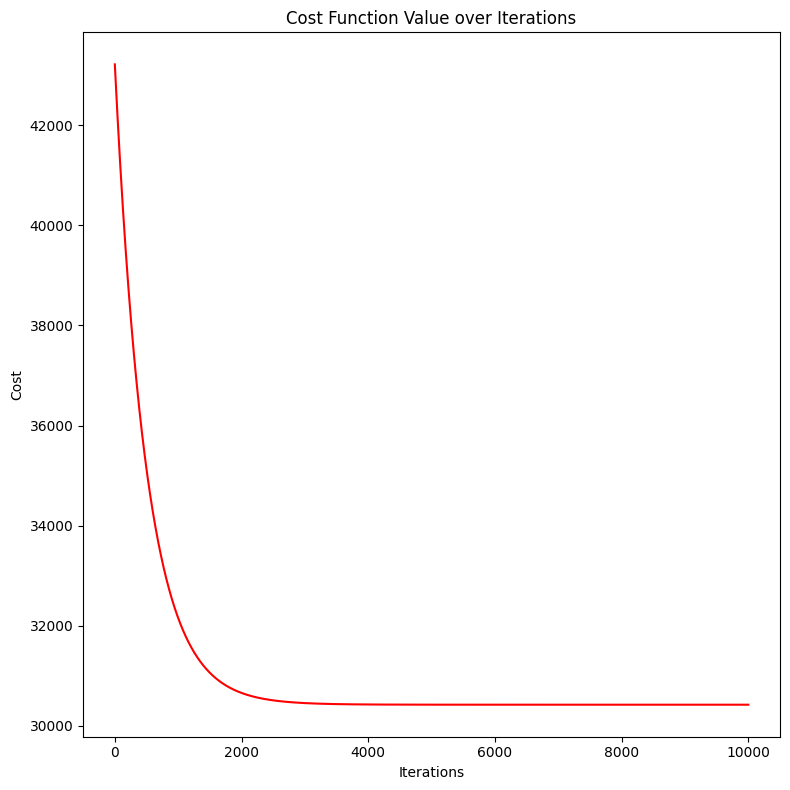

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the weight values over iterations
plt.figure(figsize=(8,8))

# Plot for cost_all
#plt.subplot(3, 1, 3)
plt.plot(j_all, color='red')
plt.title('Cost Function Value over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

#### Change the Different Values of alpha = 0.001, 0.1,0.0001, 0,00001 and see when graph convereged

### Gradient Descent Algorithm with Min-Max Normalization